In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Sravan\Downloads\bank_marketing_updated_v1.csv')

C:\Users\Sravan\AppData\Local\Temp\ipykernel_49208\1311193102.py:1: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\Sravan\Downloads\bank_marketing_updated_v1.csv')


In [3]:
df

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [4]:
###1. Understanding the Dataset
##a. Load and scrutinize the dataset to comprehend its structure, encompassing columns and data types.
##b. Inspect for any instances of missing values, outliers, or data inconsistencies.
# Rename columns using the second row and clean the dataset
df.columns = df.iloc[0]  # Set column names from the first row of data
df = df[1:]  # Drop the header row from data
df.reset_index(drop=True, inplace=True)

In [5]:
# Drop irrelevant or empty columns
df.dropna(how="all", axis=1, inplace=True)

C:\Users\Sravan\AppData\Local\Temp\ipykernel_49208\2370492471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(how="all", axis=1, inplace=True)


In [6]:
# Handle combined columns (e.g., 'jobedu' into 'job' and 'education')
if 'jobedu' in df.columns:
    df[['job', 'education']] = df['jobedu'].str.split(',', expand=True)
    df.drop(columns=['jobedu'], inplace=True)

In [7]:
df = pd.read_csv(r'C:\Users\Sravan\Downloads\bank_marketing_updated_v1.csv', skiprows=2)  # Skip the first one rows (title rows)


In [8]:
df

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [9]:
# Inspect column names
print("Original Columns:", df.columns)

Original Columns: Index(['customerid', 'age', 'salary', 'balance', 'marital', 'jobedu',
       'targeted', 'default', 'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')


In [10]:
# Example: Define the correct column names manually
correct_columns = [
    'age', 'jobedu', 'marital', 'education', 'default', 'balance', 
    'housing', 'loan', 'contact', 'day', 'month', 'duration', 
    'campaign', 'pdays', 'previous', 'poutcome', 'response'
]

In [11]:
# Check if the number of columns matches
if len(df.columns) == len(correct_columns):
    df.columns = correct_columns
else:
    print("Column count mismatch. Verify dataset structure.")

Column count mismatch. Verify dataset structure.


In [12]:
# Drop any unnecessary rows or headers from the data
df = df[1:]  # Drop any duplicate header rows
df.reset_index(drop=True, inplace=True)

In [13]:
# Convert numeric columns to appropriate types
numeric_cols = ['age', 'balance', 'campaign', 'pdays', 'previous', 'duration']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Display the cleaned dataset info
print(df.info())
print(df.head())

C:\Users\Sravan\AppData\Local\Temp\ipykernel_49208\829398888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45210 entries, 0 to 45209
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45210 non-null  int64  
 1   age         45190 non-null  float64
 2   salary      45210 non-null  int64  
 3   balance     45210 non-null  int64  
 4   marital     45210 non-null  object 
 5   jobedu      45210 non-null  object 
 6   targeted    45210 non-null  object 
 7   default     45210 non-null  object 
 8   housing     45210 non-null  object 
 9   loan        45210 non-null  object 
 10  contact     45210 non-null  object 
 11  day         45210 non-null  int64  
 12  month       45160 non-null  object 
 13  duration    0 non-null      float64
 14  campaign    45210 non-null  int64  
 15  pdays       45210 non-null  int64  
 16  previous    45210 non-null  int64  
 17  poutcome    45210 non-null  object 
 18  response    45180 non-null  object 
dtypes: float64(2), int64(7), 

In [14]:
# Inspect column names
print("Columns in the dataset:", df.columns)

# Check for missing or incorrect column names and rename if necessary
# Rename columns explicitly if needed (update names to match your dataset)
expected_columns = [
    'age', 'jobedu', 'marital', 'education', 'default', 'balance', 
    'housing', 'loan', 'contact', 'day', 'month', 'duration', 
    'campaign', 'pdays', 'previous', 'poutcome', 'response'
]
if len(df.columns) == len(expected_columns):
    df.columns = expected_columns

# Check if all numeric columns exist in the dataset
numeric_cols = ['age', 'balance', 'campaign', 'pdays', 'previous', 'duration']
missing_columns = [col for col in numeric_cols if col not in df.columns]
if missing_columns:
    print(f"Warning: These numeric columns are missing: {missing_columns}")

# Convert numeric columns that exist to numeric types
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Display dataset info and the first few rows
print(df.info())
print(df.head())

Columns in the dataset: Index(['customerid', 'age', 'salary', 'balance', 'marital', 'jobedu',
       'targeted', 'default', 'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45210 entries, 0 to 45209
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45210 non-null  int64  
 1   age         45190 non-null  float64
 2   salary      45210 non-null  int64  
 3   balance     45210 non-null  int64  
 4   marital     45210 non-null  object 
 5   jobedu      45210 non-null  object 
 6   targeted    45210 non-null  object 
 7   default     45210 non-null  object 
 8   housing     45210 non-null  object 
 9   loan        45210 non-null  object 
 10  contact     45210 non-null  object 
 11  day         45210 non-null  int64  
 12  month       45160 non-null  object 
 13  du

C:\Users\Sravan\AppData\Local\Temp\ipykernel_49208\2141793898.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


In [15]:
# Handle missing values
# Example: Fill missing 'age' values with the median
df['age'].fillna(df['age'].median())

0        44.0
1        33.0
2        47.0
3        33.0
4        35.0
         ... 
45205    51.0
45206    71.0
45207    72.0
45208    57.0
45209    37.0
Name: age, Length: 45210, dtype: float64

In [16]:
# Handle missing values
# Example: Fill missing 'age' values with the median
df['age'].fillna(df['age'].median())

0        44.0
1        33.0
2        47.0
3        33.0
4        35.0
         ... 
45205    51.0
45206    71.0
45207    72.0
45208    57.0
45209    37.0
Name: age, Length: 45210, dtype: float64

In [17]:
# Replace missing categorical values with 'unknown'
categorical_cols = ['marital', 'housing', 'loan', 'response', 'month']
for col in categorical_cols:
    if col in df.columns:
        df.loc[:, col] = df[col].fillna('unknown')  # Use .loc[] for explicit assignment

In [18]:
# Convert categorical columns to category dtype for optimization
for col in categorical_cols:
    if col in df.columns:
        df.loc[:, col] = df[col].astype('category')  # Use .loc[] to avoid warnings

In [19]:
df

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",NaN,1,-1,0,unknown,no
1,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",NaN,1,-1,0,unknown,no
2,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",NaN,1,-1,0,unknown,no
3,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",NaN,1,-1,0,unknown,no
4,6,35.0,100000,231,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",NaN,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",NaN,3,-1,0,unknown,yes
45206,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",NaN,2,-1,0,unknown,yes
45207,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",NaN,5,184,3,success,yes
45208,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",NaN,4,-1,0,unknown,no


Statistics for age:
Mean: 40.93527329055101
Median: 39.0
Standard Deviation: 10.619011661623283

Statistics for salary:
Mean: 57005.2200840522
Median: 60000.0
Standard Deviation: 32085.436103964596

Statistics for balance:
Mean: 1362.2547887635478
Median: 448.0
Standard Deviation: 3044.7972892233556

Statistics for campaign:
Mean: 2.763879672638797
Median: 2.0
Standard Deviation: 3.098044039710044

Statistics for pdays:
Mean: 40.19873921698739
Median: -1.0
Standard Deviation: 100.12966590923342

Statistics for previous:
Mean: 0.5803362088033621
Median: 0.0
Standard Deviation: 2.3034649032490555

Distribution of the target variable (response):
response
no         39893
yes         5287
unknown       30
Name: count, dtype: int64


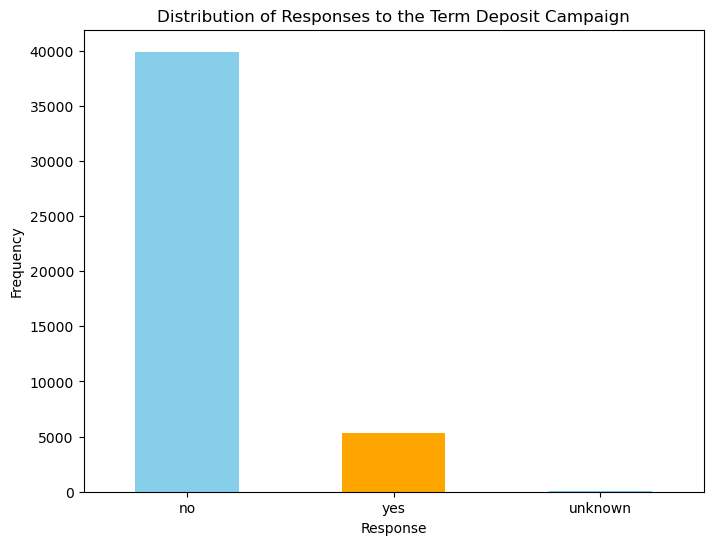

In [20]:
# 2.a. Derive summary statistics (mean, median, standard deviation) for relevant columns
numeric_cols = ['age', 'salary', 'balance', 'campaign', 'pdays', 'previous']  

# Calculate summary statistics
for col in numeric_cols:
    if col in df.columns:
        print(f"Statistics for {col}:")
        print(f"Mean: {df[col].mean()}")
        print(f"Median: {df[col].median()}")
        print(f"Standard Deviation: {df[col].std()}\n")

# b. Examine the distribution of the target variable (response column)
if 'response' in df.columns:
    print("Distribution of the target variable (response):")
    print(df['response'].value_counts())

    # Visualizing the distribution using a bar plot
    import matplotlib.pyplot as plt
    df['response'].value_counts().plot(kind='bar', color=['skyblue', 'orange'], figsize=(8, 6))
    plt.title("Distribution of Responses to the Term Deposit Campaign")
    plt.xlabel("Response")
    plt.ylabel("Frequency")
    plt.xticks(rotation=0)
    plt.show()

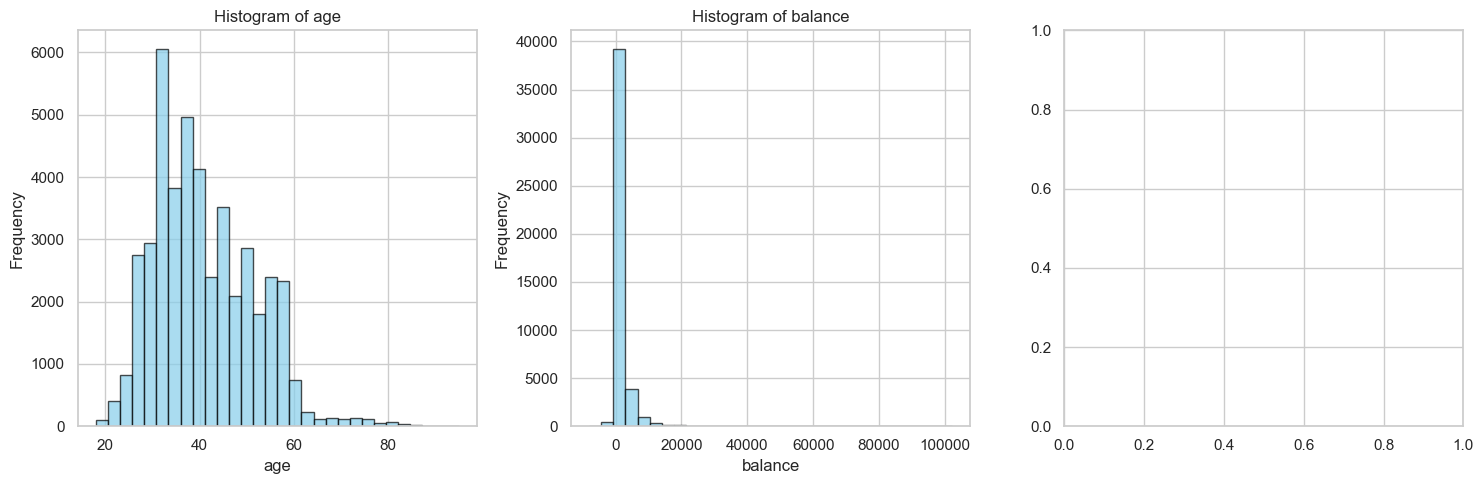

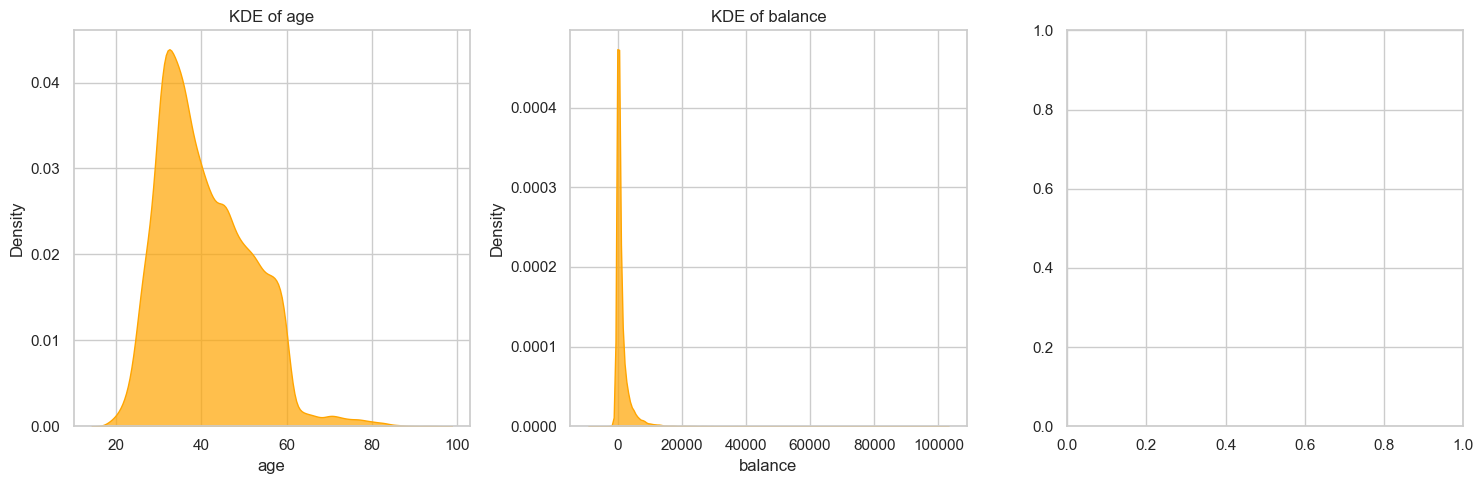

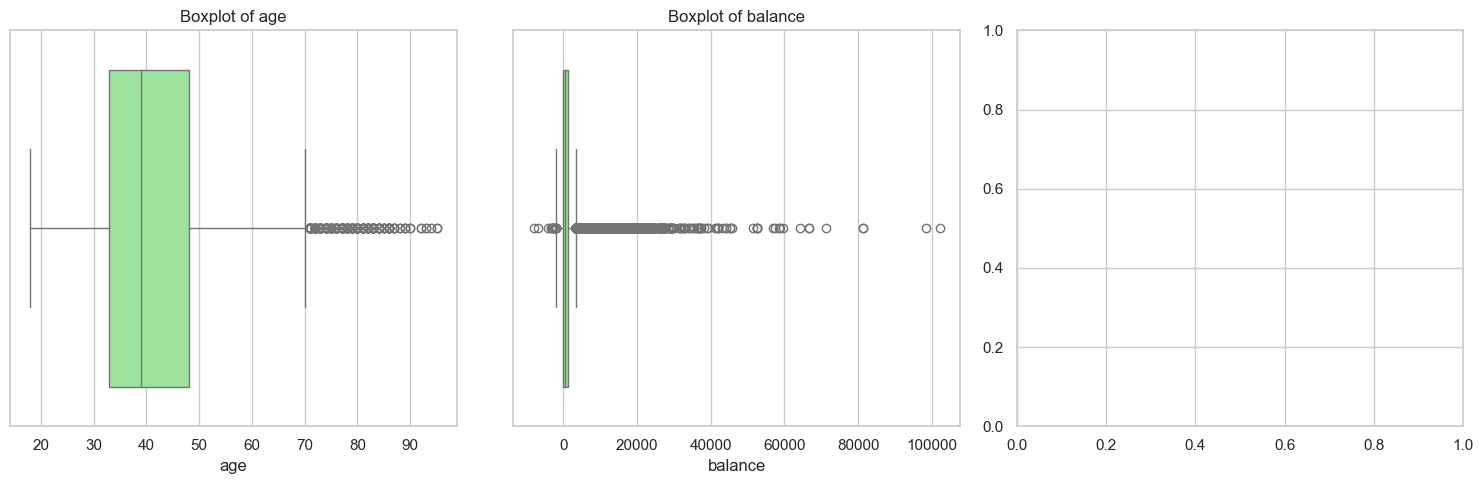

In [21]:
# 3.a. Examine the distribution of individual key features: age, balance, and duration
key_features = ['age', 'balance', 'duration']

# Clean the data by dropping rows with NaN values in key features
df_cleaned = df[key_features].dropna(how='all')

# Check if any of the columns have only NaN values
key_features = df_cleaned.columns

# Set up the plotting style
sns.set(style="whitegrid")

# Create subplots to visualize the distribution of each feature
plt.figure(figsize=(15, 5))

# Plotting histograms for each feature
for i, col in enumerate(key_features, 1):
    plt.subplot(1, len(key_features), i)
    
    # Only plot if column has data
    if df_cleaned[col].dropna().shape[0] > 0:
        plt.hist(df_cleaned[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# b. Kernel Density Plot for the features
plt.figure(figsize=(15, 5))

# Plotting Kernel Density Estimation (KDE) for each feature
for i, col in enumerate(key_features, 1):
    plt.subplot(1, len(key_features), i)
    
    # Only plot if column has data
    if df_cleaned[col].dropna().shape[0] > 0:
        sns.kdeplot(df_cleaned[col], fill=True, color="orange", alpha=0.7)
        plt.title(f'KDE of {col}')
        plt.xlabel(col)
        plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Box plots to detect outliers
plt.figure(figsize=(15, 5))

# Plotting boxplots for each feature
for i, col in enumerate(key_features, 1):
    plt.subplot(1, len(key_features), i)
    
    # Only plot if column has data
    if df_cleaned[col].dropna().shape[0] > 0:
        sns.boxplot(x=df_cleaned[col], color='lightgreen')
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)

plt.tight_layout()
plt.show()

In [22]:
print(df.columns)

Index(['customerid', 'age', 'salary', 'balance', 'marital', 'jobedu',
       'targeted', 'default', 'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')


<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


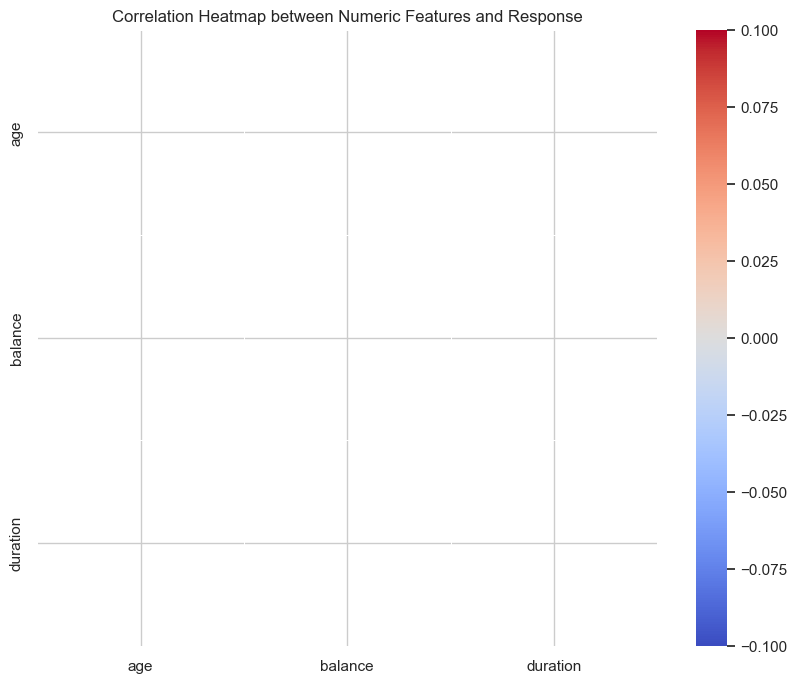

In [23]:
#4. Map 'response' column to numeric values (1 = yes, 0 = no)
if 'response' in df_cleaned.columns:
    df_cleaned['response'] = df_cleaned['response'].map({'yes': 1, 'no': 0})

# Define categorical columns for bivariate analysis
categorical_cols = ['job', 'education', 'marital', 'housing', 'loan']

# Filter only existing categorical columns
valid_categorical_cols = [col for col in categorical_cols if col in df_cleaned.columns]

# Set up the plotting style
sns.set(style="whitegrid")
# 1. Bar Chart for the relationship between categorical variables and target (response)
plt.figure(figsize=(16, 10))

for i, col in enumerate(valid_categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue='response', data=df_cleaned, palette='Set2')
    plt.title(f'{col} vs Response (Term Deposit Subscription)')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()



# 2. Stacked Bar Chart to see proportions for each category of 'response'
plt.figure(figsize=(16, 10))

for i, col in enumerate(valid_categorical_cols, 1):
    plt.subplot(2, 3, i)
    cross_tab = pd.crosstab(df_cleaned[col], df_cleaned['response'], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, ax=plt.gca(), color=['red', 'green'], alpha=0.7)
    plt.title(f'Stacked Bar Chart: {col} vs Response')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.legend(['No', 'Yes'])

plt.tight_layout()
plt.show()

# 3. Heatmap to show correlation between numeric features and the target variable
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Filter valid numeric columns
valid_numeric_cols = [col for col in numeric_cols if col in df_cleaned.columns]

if 'response' in df_cleaned.columns:
    valid_numeric_cols += ['response']

# Ensure numeric columns are free of NaN before correlation
correlation_data = df_cleaned[valid_numeric_cols].dropna()

# Calculate and plot the correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = correlation_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap between Numeric Features and Response')
plt.show()

In [24]:
df.columns

Index(['customerid', 'age', 'salary', 'balance', 'marital', 'jobedu',
       'targeted', 'default', 'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [25]:
import plotly.express as px

Column 'job' not found in DataFrame.
Column 'education' not found in DataFrame.


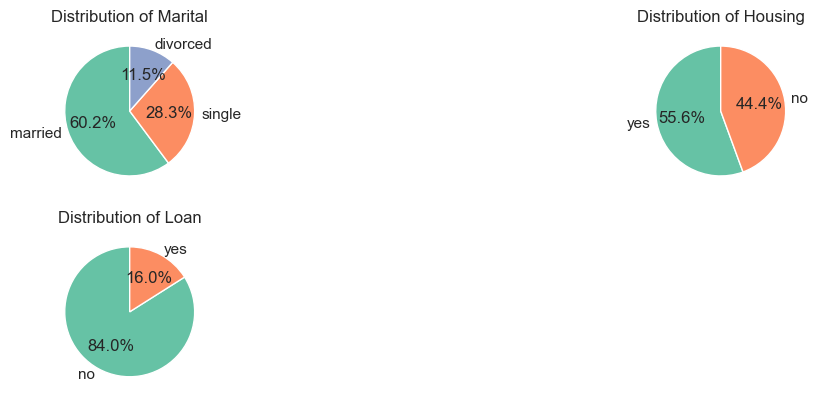

In [27]:
5.5. Categorical Variables Analysis
plt.figure(figsize=(12, 6))
n_cols = 2  # Number of columns for subplots
n_rows = (len(categorical_cols) + 1) // n_cols  

for i, col in enumerate(categorical_cols, 1):
    if col in df.columns:  # Ensure column exists
        plt.subplot(n_rows, n_cols, i)
        
        # Calculate the distribution of each category
        value_counts = df[col].value_counts()
        
        # Create a pie chart
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', 
                colors=sns.color_palette('Set2', len(value_counts)), startangle=90)
        
        plt.title(f'Distribution of {col.capitalize()}')
        plt.ylabel('')  # Remove the ylabel for pie chart
        
    else:
        print(f"Column '{col}' not found in DataFrame.")

plt.tight_layout()
plt.show()

C:\Users\Sravan\AppData\Local\Temp\ipykernel_49208\63495291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response'] = df['response'].apply(lambda x: 1 if x == 'yes' else 0)
C:\Users\Sravan\AppData\Local\Temp\ipykernel_49208\63495291.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_num'] = df['month'].map(month_mapping)


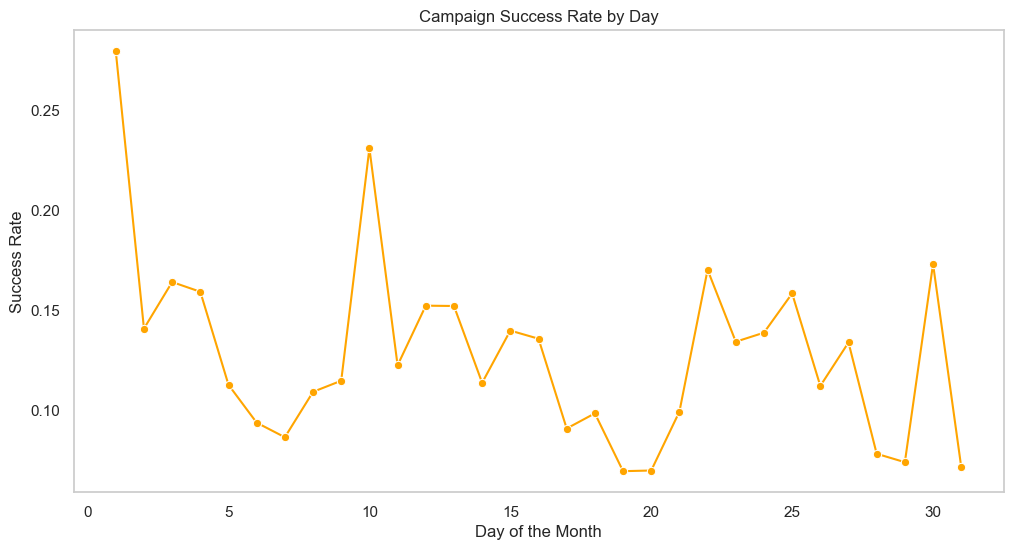

In [29]:
###6. Temporal Analysis
# Ensure 'response' column is binary (e.g., 1 for 'yes', 0 for 'no')
df['response'] = df['response'].apply(lambda x: 1 if x == 'yes' else 0)

# Map 'month' to numerical values for easier analysis
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 
                 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df['month_num'] = df['month'].map(month_mapping)

# Success rate by month
month_success = (
    df.groupby('month_num')['response']
    .mean()
    .reset_index()
    .rename(columns={'response': 'success_rate'})
)

# Success rate by day
day_success = (
    df.groupby('day')['response']
    .mean()
    .reset_index()
    .rename(columns={'response': 'success_rate'})
)
# Plot success rate by day
plt.figure(figsize=(12, 6))
sns.lineplot(data=day_success, x='day', y='success_rate', marker='o', color='orange')
plt.title('Campaign Success Rate by Day')
plt.xlabel('Day of the Month')
plt.ylabel('Success Rate')
plt.grid()
plt.show()

In [30]:
7. Feature Engineering
# Step 1: Create new features

# Create age groups
age_bins = [0, 18, 30, 45, 60, 100]
age_labels = ['<18', '18-30', '30-45', '45-60', '>60']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Create income categories
income_bins = [0, 20000, 40000, 60000, 80000, float('inf')]
income_labels = ['Low', 'Lower-Middle', 'Middle', 'Upper-Middle', 'High']
df['income_category'] = pd.cut(df['salary'], bins=income_bins, labels=income_labels, right=False)

# Step 2: Encode categorical variables

# Encoding 'marital' column using one-hot encoding
df = pd.get_dummies(df, columns=['marital'], prefix='marital', drop_first=True)

# Encoding 'jobedu' column using label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['jobedu_encoded'] = le.fit_transform(df['jobedu'])

# Step 3: Verify the new features
print(df[['age', 'age_group', 'salary', 'income_category', 'jobedu', 'jobedu_encoded']].head())

# Step 4: Save the updated dataframe for modeling
df.to_csv('df_with_features.csv', index=False)

C:\Users\Sravan\AppData\Local\Temp\ipykernel_49208\3141117451.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
C:\Users\Sravan\AppData\Local\Temp\ipykernel_49208\3141117451.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income_category'] = pd.cut(df['salary'], bins=income_bins, labels=income_labels, right=False)


    age age_group  salary income_category                  jobedu  \
0  44.0     30-45   60000    Upper-Middle    technician,secondary   
1  33.0     30-45  120000            High  entrepreneur,secondary   
2  47.0     45-60   20000    Lower-Middle     blue-collar,unknown   
3  33.0     30-45       0             Low         unknown,unknown   
4  35.0     30-45  100000            High     management,tertiary   

   jobedu_encoded  
0              37  
1               9  
2               7  
3              47  
4              18  


C:\Users\Sravan\AppData\Local\Temp\ipykernel_49208\4072631598.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col]):


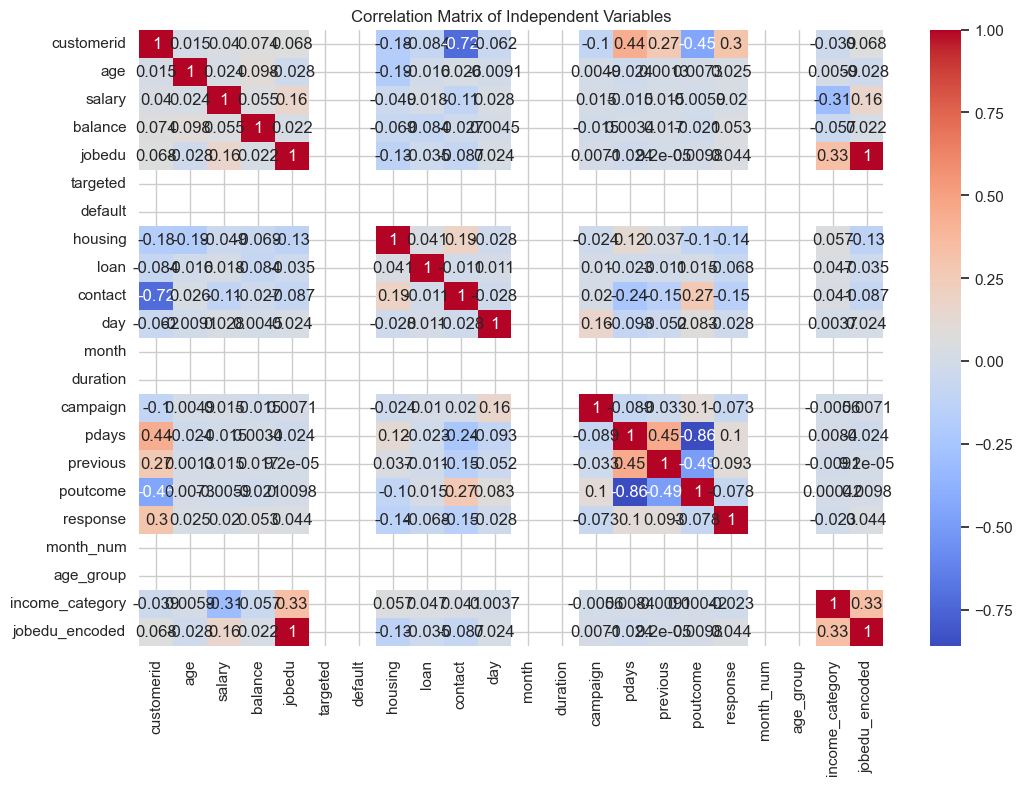

Highly correlated feature pairs (correlation > 0.8 or < -0.8):
jobedu and jobedu_encoded: 1.00
pdays and poutcome: -0.86
poutcome and pdays: -0.86
jobedu_encoded and jobedu: 1.00


In [43]:
###8. Correlation Analysis
# Step 1: Ensure all categorical columns are correctly encoded
categorical_cols = ['income_category', 'marital_married', 'contact', 'poutcome']

# Check column names and strip spaces
df.columns = df.columns.str.strip()
# Step 2: Convert categorical columns to 'object' type and fill missing values with 'missing'
for col in categorical_cols:
    if col in df.columns:
        if df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col]):
            df[col] = df[col].astype('object')  # Ensure it's of type 'object'
            df[col] = df[col].fillna('missing')  # Fill NaN with 'missing'
# Step 3: Apply Label Encoding for categorical columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    if col in df.columns:
        if df[col].dtype == 'object' or pd.api.types.is_string_dtype(df[col]):
            df[col] = label_encoder.fit_transform(df[col])            
# Step 5: Convert all data to numeric (ensure all columns are numeric)
df = df.apply(pd.to_numeric, errors='coerce')

# Step 6: Exclude non-numeric columns for correlation calculation
df_numeric = df.select_dtypes(include=['number'])

# Step 7: Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Step 8: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Independent Variables')
plt.show()

# Step 9: Identify highly correlated feature pairs (greater than 0.8 or less than -0.8)
high_corr_pairs = []
threshold = 0.8

# Iterate through the correlation matrix and find pairs with high correlation
for i in correlation_matrix.columns:
    for j in correlation_matrix.columns:
        if i != j and abs(correlation_matrix.loc[i, j]) > threshold:
            high_corr_pairs.append((i, j, correlation_matrix.loc[i, j]))

# Step 10: Print high correlation pairs (multicollinearity)
if high_corr_pairs:
    print("Highly correlated feature pairs (correlation > 0.8 or < -0.8):")
    for pair in high_corr_pairs:
        print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")
else:
    print("No highly correlated feature pairs found.")

In [44]:
###9. Outlier Detection and Handling
# Step 1: Identify numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Detect and handle outliers using the IQR method
for col in numeric_cols:
    # Calculate Q1, Q3, and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound))

    # Print the number of outliers detected
    print(f"{col}: {outliers.sum()} outliers detected.")

    # Step 3: Handle outliers (replace them with boundary values)
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Step 4: Re-check for outliers after handling
print("\nOutliers handled. Checking for remaining extreme values...")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound))
    print(f"{col}: {outliers.sum()} remaining outliers.")

# Optional: Save the cleaned dataset
df.to_csv("cleaned_data_no_outliers.csv", index=False)

customerid: 0 outliers detected.
age: 487 outliers detected.
salary: 0 outliers detected.
balance: 4731 outliers detected.
targeted: 0 outliers detected.
default: 0 outliers detected.
day: 0 outliers detected.
month: 0 outliers detected.
duration: 0 outliers detected.
campaign: 3064 outliers detected.
pdays: 8257 outliers detected.
previous: 8257 outliers detected.
response: 5287 outliers detected.
month_num: 0 outliers detected.
age_group: 0 outliers detected.

Outliers handled. Checking for remaining extreme values...
customerid: 0 remaining outliers.
age: 0 remaining outliers.
salary: 0 remaining outliers.
balance: 0 remaining outliers.
targeted: 0 remaining outliers.
default: 0 remaining outliers.
day: 0 remaining outliers.
month: 0 remaining outliers.
duration: 0 remaining outliers.
campaign: 0 remaining outliers.
pdays: 0 remaining outliers.
previous: 0 remaining outliers.
response: 0 remaining outliers.
month_num: 0 remaining outliers.
age_group: 0 remaining outliers.
